In [13]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as pl
dat=pd.read_csv('.\\Lung1.clinical.csv')
dat.head()

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1


### Mean Value Imputation for entries with censored outcomes

Mean survival time of uncensored patients under each 'Histology' category is used to impute the survival time of patients with censored outcomes.

In [4]:
dat_uncensored = dat[dat['deadstatus']==1]
dat_censored = dat[dat['deadstatus']==0]

squamous_cell_uncensored_mean = np.mean(dat[(dat['Histology']=='squamous cell carcinoma') & dat['deadstatus']==1]['Survival.time'])
large_cell_mean = np.mean(dat[(dat['Histology']=='large cell') & dat['deadstatus']==1]['Survival.time'])
adenocarcinoma_mean = np.mean(dat[(dat['Histology']=='adenocarcinoma') & dat['deadstatus']==1]['Survival.time'])
nos_mean = np.mean(dat[(dat['Histology']=='nos') & dat['deadstatus']==1]['Survival.time'])
all_mean = np.mean(dat[dat['deadstatus']==1]['Survival.time'])

dat_scc_censored = dat[(dat['Histology']=='squamous cell carcinoma') & (dat['deadstatus']==0)]
dat_lc_censored = dat[(dat['Histology']=='large cell') & (dat['deadstatus']==0)]
dat_nos_censored = dat[(dat['Histology']=='nos') & (dat['deadstatus']==0)]
dat_ac_censored = dat[(dat['Histology']=='adenocarcinoma') & (dat['deadstatus']==0)]
dat_na_censored = dat[(dat['Histology'].isnull()) & (dat['deadstatus']==0)]

dat_scc_censored['imputed_survival'] = np.where(dat_scc_censored['Survival.time'] >= squamous_cell_uncensored_mean , dat_scc_censored['Survival.time'], squamous_cell_uncensored_mean)
dat_lc_censored['imputed_survival'] = np.where(dat_lc_censored['Survival.time'] >= large_cell_mean , dat_lc_censored['Survival.time'], large_cell_mean)
dat_nos_censored['imputed_survival'] = np.where(dat_nos_censored['Survival.time'] >= nos_mean , dat_nos_censored['Survival.time'], nos_mean)
dat_ac_censored['imputed_survival'] = np.where(dat_ac_censored['Survival.time'] >= adenocarcinoma_mean , dat_ac_censored['Survival.time'], adenocarcinoma_mean)
dat_na_censored['imputed_survival'] = np.where(dat_na_censored['Survival.time'] >= all_mean , dat_na_censored['Survival.time'], all_mean)

dat_censored = pd.concat([dat_scc_censored,dat_lc_censored,dat_nos_censored,dat_ac_censored, dat_na_censored ])

In [5]:
dat_censored.head()

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus,imputed_survival
9,LUNG1-010,71.0554,4.0,3,0,IIIb,squamous cell carcinoma,female,2119,0,2119.0
26,LUNG1-027,70.1684,1.0,0,0,I,squamous cell carcinoma,male,1972,0,1972.0
31,LUNG1-032,75.6934,2.0,0,0,I,squamous cell carcinoma,male,525,0,525.0
46,LUNG1-047,46.5024,2.0,2,0,IIIa,squamous cell carcinoma,male,1810,0,1810.0
60,LUNG1-061,62.1218,2.0,3,0,IIIb,squamous cell carcinoma,male,1573,0,1573.0


### Calculate 2 year survival

In [9]:
dat_censored['2_year_survival'] = dat_censored['Survival.time'] - 730
dat_uncensored['2_year_survival'] = dat_uncensored['Survival.time'] - 730
df1 = dat_censored[['PatientID', '2_year_survival']]
df2 = dat_uncensored[['PatientID', '2_year_survival']]
dat_all = pd.concat([df1,df2])

In [10]:
dat_all.to_csv('dat_all.csv')

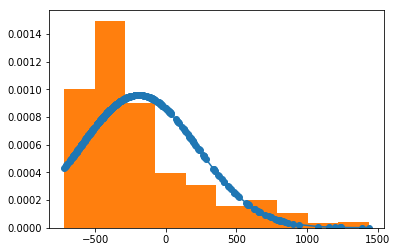

In [14]:
h = sorted(list(dat_all['2_year_survival']))
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
pl.plot(h,fit,'-o')
pl.hist(h,normed=True) 
pl.show()

### Data is further grouped into 2 classes

In [12]:
dat_all['class']=np.where(
dat_all['2_year_survival'] > 0, 1, 0)

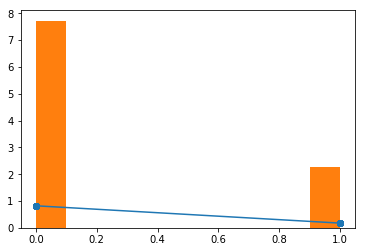

In [15]:
h = sorted(list(dat_all['class']))
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
pl.plot(h,fit,'-o')
pl.hist(h,normed=True) 
pl.show()